In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#### Creating Dataset
A simple dataset using numpy arrays

### Notes by Yash: 

#### Purpose
1. Purpose: how to use gradient descent to train a neural network: has two passes- forward pass to make a prediction adn the optimizer calclates the loss and updates the model parameters in a backward pass
1. Gradients are partial derivative of loss wrt each model parameter

#### Setup
1. PyTorch and other FW use automatic differentiation using the autograd package. 
1. **Notice the column format**: These are single features, `x_train` is a single column vector
and `y_train` corresponds to the target value. 
1. We plot these data on a scatter plot - noticing the linearity of the relationship. 
1. To create a model, we first import the `torch` library and print the required grad property for both tensors, set to False by default. 
1. We create our basic NN model, with `input_size`, `hidden_size`, and `output_size` of the respective layers, all set to 1
1. We will create this NN from scratch. Won't use any of Pytorch's built-in layers: `w1`: weights, shape is input size * hidden size and it needs gradients since it has model parameters. Gradients wrt loss function will be used to 
1. W2 shows the connect from hidden layer to output and grad is true. we will also train it using AutoGrad
1. Next we have a design hyper parameter: learning rate which is the size of the step the model takes to the optimum. We multiply the learning rate with the gradient to determine how much to modify the training parameters. 

#### Training

1. After making a forward path, we get `y_pred`: current predicted vales which we can use against the actual `y_train` values to calc the MSE loss. 
1. Print periodically so we know we're converging
1. Calculate the gradient by performing the backward pass with `loss.backward()`: now `w1` and `w2` have gradients. 
1. For udpating, we don't need gradient tracking. so turn it off.
1. subtract from teh current values of w1 and w2 zeroing out the existing gradients on both of these tensors: `w1.grad.zero_()` and `w2.grad.zero_()`

#### Predictions

1. Run the predicted tensor by multiplying x_train_tensor with the weights. 
1. Convert to numpy format to visualize with `matplotlib` scatter plot - to view the training data and the x_training against predicted vales
1. We did not train for long - update to 100 iterations (epochs)


In [3]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                     [8.9], [5.2], [8.59], [2.1], [8] , 
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], 
                     [2.6], [1.96], [3.53], [1.76], [3.2] , 
                     [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)

In [4]:
x_train.shape, y_train.shape

((15, 1), (15, 1))

#### View the data
There seems to be some relationship which can be plotted between x_train and y_train. A regression line can be drawn to represent the relationship

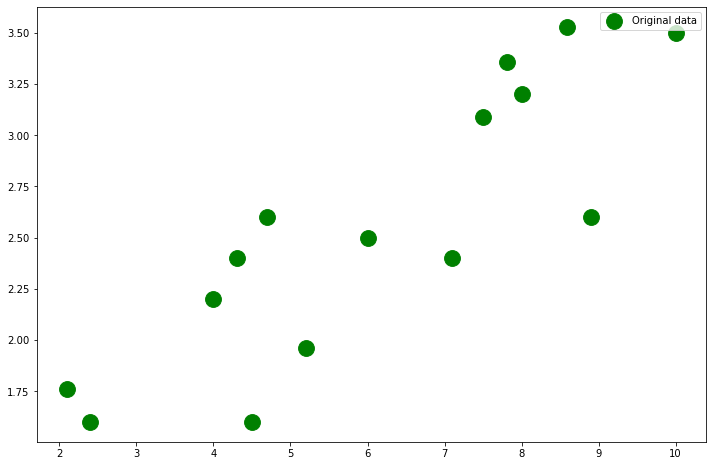

In [5]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [6]:
import torch 

#### Converting data to pytorch tensors
By default `requires_grad = False`

In [7]:
X_train = torch.from_numpy(x_train) 
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


#### Set the details for our neural network
Input, output and hidden layer sizes plus the learning rate

In [8]:
input_size = 1 
hidden_size = 1
output_size = 1

#### Create random Tensors for weights.<br>
Setting requires_grad=True indicates that we want to compute gradients with respect to these Tensors during the backward pass

In [9]:
w1 = torch.rand(input_size, 
                hidden_size, 
                
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [10]:
w2 = torch.rand(hidden_size, 
                output_size, 
                
                requires_grad=True)
w2.shape

torch.Size([1, 1])

## Training

#### Foward Pass:
* Predicting Y with input data X
* finding (matrix X matrix) using .mm function, finding product of X_train and w1 and activation function is identity function
* again doing mat product data with second weight w2

#### Finding Loss:
* Finding difference between Y_train and Y_pred by squaring the difference and then summing out, similar to nn.MSELoss 


#### For the loss_backward() function call:
* backward pass will compute the gradient of loss with respect to all Tensors with requires_grad=True. 
* After this call w1.grad and w2.grad will be Tensors holding the gradient of the loss with respect to w1 and w2 respectively.

#### Manually updating the weights
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* reducing weight with multiple of learning rate and gradient
* manually zero the weight gradients after updating weights

In [11]:
learning_rate = 1e-6

In [12]:
# Start at 10. Change this to 100, 1000 and 3000 and run the code all the way to the plot at the bottom
num_iter = 3000
for iter in range(1, num_iter):
    
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad(): # for the updates gradient tracking not needed
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 4.368948936462402
100 4.342796325683594
150 4.319035053253174
200 4.297453880310059
250 4.277858257293701
300 4.260070323944092
350 4.243931293487549
400 4.2292914390563965
450 4.216014385223389
500 4.203976631164551
550 4.193065166473389
600 4.183178901672363
650 4.174221515655518
700 4.166108131408691
750 4.1587605476379395
800 4.152108669281006
850 4.146088123321533
900 4.140639305114746
950 4.135708332061768
1000 4.131246089935303
1050 4.127211093902588
1100 4.123560905456543
1150 4.120258808135986
1200 4.117274284362793
1250 4.114574909210205
1300 4.11213493347168
1350 4.10992956161499
1400 4.107936859130859
1450 4.106136322021484
1500 4.104507923126221
1550 4.103037357330322
1600 4.101708889007568
1650 4.1005096435546875
1700 4.099423885345459
1750 4.098445415496826
1800 4.097560882568359
1850 4.0967631340026855
1900 4.096041679382324
1950 4.095390319824219
2000 4.094802379608154
2050 4.0942702293396
2100 4.093791961669922
2150 4.09335994720459
2200 4.092968940734863
2250 4.09

In [13]:
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[0.5625]], requires_grad=True)
w2:  tensor([[0.7033]], requires_grad=True)


#### Checking the output

Converting data into a tensor

In [14]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

#### Get the predicted values using the weights 
Using final weights calculated from our training in order to get the predicted values

In [15]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8593],
        [0.9494],
        [2.9670],
        [2.8087],
        [1.7011],
        [3.0920],
        [3.5208],
        [2.0571],
        [3.3982],
        [0.8308],
        [3.1648],
        [3.9560],
        [1.7802],
        [2.3736],
        [1.5824]], grad_fn=<MmBackward>)

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [16]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8592978 ],
       [0.94942874],
       [2.9669647 ],
       [2.8087265 ],
       [1.7010598 ],
       [3.0919728 ],
       [3.520798  ],
       [2.0570955 ],
       [3.3981638 ],
       [0.83075005],
       [3.1647625 ],
       [3.9559531 ],
       [1.7801789 ],
       [2.3735719 ],
       [1.5823812 ]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

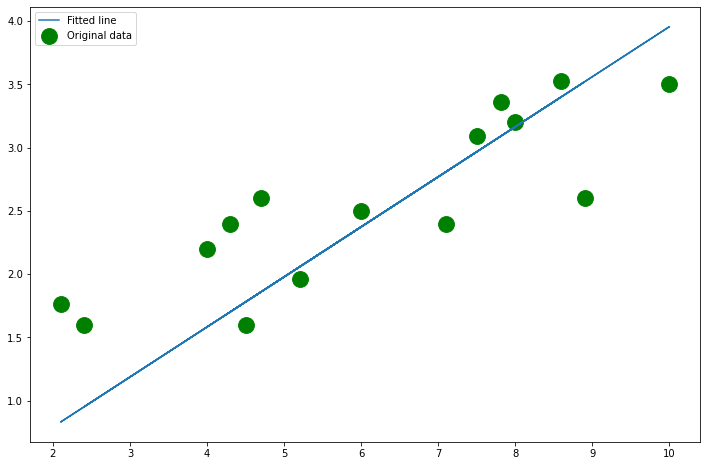

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g') 
plt.plot(x_train, predicted, label = 'Fitted line ')
plt.legend() 
plt.show()